# Climate Data – A hands-on python course
Author: Pedro Herrera Lormendez (pedrolormendez@gmail.com)

## Time series and 2D visualization

### Importing the neccessary modules

In [8]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
sys.path.append(os.path.abspath('../help_code'))
import tools

### Reading the netcdf file

Using the monthly Global surface temperature data: GISTEMP: NASA Goddard Institute for Space Studies (GISS) Surface Temperature Analys: https://climatedataguide.ucar.edu/climate-data/global-surface-temperature-data-gistemp-nasa-goddard-institute-space-studies-giss

In [123]:
# Definging the file path
file_path = '../data/air.2x2.250.mon.anom.comb.nc'
# Reading the netcdf file using xarray
DS = xr.open_dataset(file_path)
# Fixing the longitude coordinates
DS = tools.convert_and_sort_coords(DS)
print(DS)

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 1727)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2023-11-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. Converted to chunked, def...
    dataset_title:  GISS Surface Temperature Analysis
    comments:       This is the 1200km smoothed combined land,ocean version o...
    References:     https://www.psl.noaa.gov/data/gridded/data.gistemp.html
    update_date:    12/2023
    dat

### Timeseries

#### Extracting the spatial mean
Extracting the temperature variable (air) and computing the spatial (lat, lon) mean value of the data.

In [125]:
# Extracting the t2m variable
t2m = DS.air
# Computing the spatial mean
# t2m_mean = t2m.mean(dim = ('lat', 'lon'))
t2m_mean2 = t2m.mean(dim = ('lat', 'lon'))

print(f"The shape of the t2m_mean variable is: {t2m_mean.shape}")
print(f"The dimensions of t2m_mean are: {t2m_mean.dims}")
print(f"The time dimension goes from {t2m_mean.time[0].values} to {t2m_mean.time[-1].values}")

The shape of the t2m_mean variable is: (1727,)
The dimensions of t2m_mean are: ('time',)
The time dimension goes from 1880-01-01T00:00:00.000000000 to 2023-11-01T00:00:00.000000000


#### Using matplotlib to plot the data

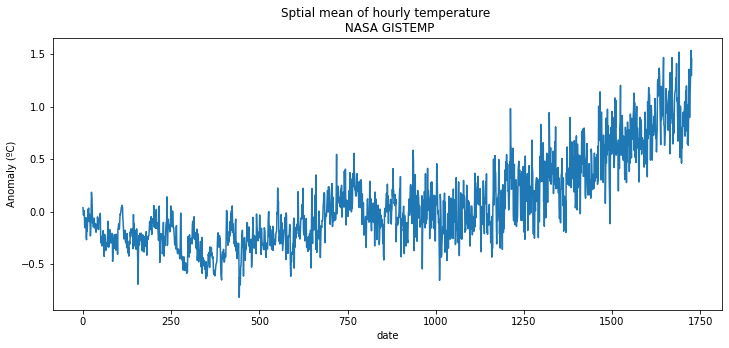

In [130]:
plt.figure(figsize=(12,5))
# plt.plot(x,y)
plt.plot(t2m_mean)
# plt.plot(t2m_mean.time, t2m_mean.values, color='k', linestyle='--', marker='*')
plt.xlabel('date')
plt.ylabel("Anomaly (ºC)")
plt.title('Sptial mean of hourly temperature \n NASA GISTEMP')
plt.show()

#### Smoothing
Smothing help us to visually detect patterns and trends to see a clearer signal in a timeseries. A very conventional method is the moving average. The 'moving average' refers to the process where, at any given moment, we calculate the (potentially weighted) averages of values in proximity to a specific point in time. For example, a moving average  at time _t_ with a window of 3, would imply the average of _t - 1_, _t_ and _t + 1_ 

In [154]:
# Smothing seasonal variations using a 1-year moving average
# Computing the 3-mothly moving average
t2m_6month_mean = t2m_mean.rolling(time=12, center=True).mean()

<div style="background-color:lightgreen; padding:10px">

A 30-year moving average helps in understanding long-term climatic trends. It helps to reveal long-term trends in the data. It smooths out short-term variations, including annual and inter-annual fluctuations, making it easier to observe underlying patterns and trends that unfold over multiple decades.
        <ul>
        <li>Compute the 30-year moving average</li>
        <li>Plot tthe 30-year moving average on top of the figure below</li>
            <li>Add color and appropiate label to the new lineplot</li>
    </ul>
</div>

In [162]:
t2m_30year_mean = t2m_mean.rolling(time=360, center=True).mean()

No handles with labels found to put in legend.


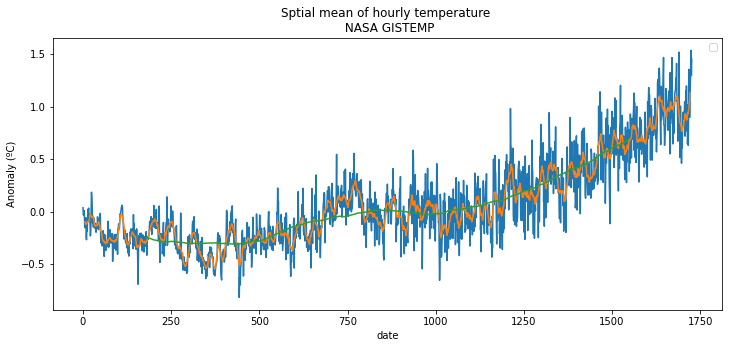

In [163]:
plt.figure(figsize=(12,5))
# plt.plot(x,y)
plt.plot(t2m_mean) # include label
plt.plot(t2m_6month_mean) # include label
plt.plot(t2m_30year_mean)
# your code goes here
plt.xlabel('date')
plt.ylabel("Anomaly (ºC)")
plt.title('Sptial mean of hourly temperature \n NASA GISTEMP')
plt.legend()
# plt.savefig('figures/global_tair_caanomaly.png', dpi=300)
plt.show()

#### Trend analysis

### 2D visualization
Matplotlib and Cartopy allows us to plot 2D and 3D geoespatial data over a map. 2D maps require two dimensions (x and y), usually latititude and longitude, in order to be plotted over a map.

#### Extracting a 2D DataArray

In [57]:
# Extracting a 2D DataArray from the t2m variable
print(f"The t2m variable has the following shape: {t2m.shape} with dimensions: {t2m.dims}")

The t2m variable has the following shape: (96, 90, 180) with dimensions: ('time', 'lat', 'lon')


In [61]:
t2m_2d = t2m.sel(time='2022-07-19T15:00:00.000000000')
print(f"The t2m_2d variable has a shape of {t2m_2d.shape} with dimensions: {t2m_2d.dims}")

The t2m_2d variable has a shape of (90, 180) with dimensions: ('lat', 'lon')


#### Plotting the 2D data with cartopy and matplotlib
- Colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

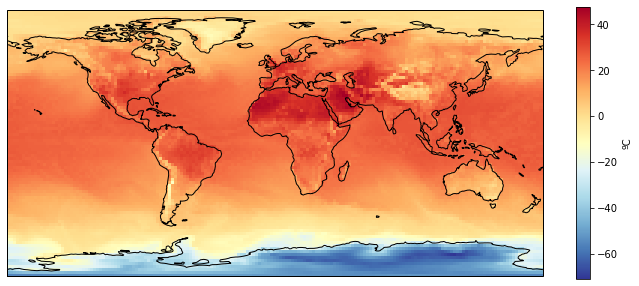

In [81]:
# Plotting the data on a map using Cartopy
projection = ccrs.PlateCarree()  # This is a common projection for geographical data
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': projection})
ax.coastlines()
# Using matplotlib
lons = t2m_2d.lon
lats = t2m_2d.lat
# plot.pcolor(x,y,z)
plt.pcolor(lons, lats, t2m_2d-273.15, cmap ='RdYlBu_r')
# plt.contourf(x,y,z)
# plt.contourf(lons, lats, t2m_2d-273.15, cmap = 'RdYlBu_r')
plt.colorbar(label='ºC')

#### Other map projections
- List of map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html